# Code alongs - MLP - Multilayered perceptron

In [4]:
import matplotlib.pyplot as plt 
import numpy as np 
from tensorflow.keras.datasets.mnist import load_data

# from tensorflows documentation 
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data
(x_train, y_train), (x_test, y_test) = load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [6]:
x_train.shape

(60000, 28, 28)

7

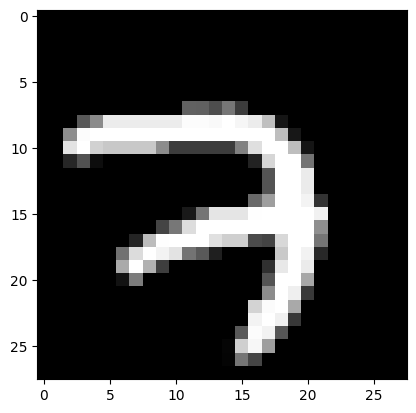

In [21]:
plt.imshow(x_train[5000], cmap="gray")
y_train[5000]

In [19]:
# 2D image for index 5000 - it contains 28x28 
x_train[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [20]:
x_train[5000].shape

(28, 28)

In [16]:
# pixel intensity between 0 and 254 for this image
x_train[5000].min(), x_train[5000].max()

(0, 254)

In [18]:
# pixel value at row 10, col 5 for image 5000
x_train[5000,10,5]

199

In [22]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [25]:
y_train.shape, y_train.min(), y_train.max()

((60000,), 0, 9)

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

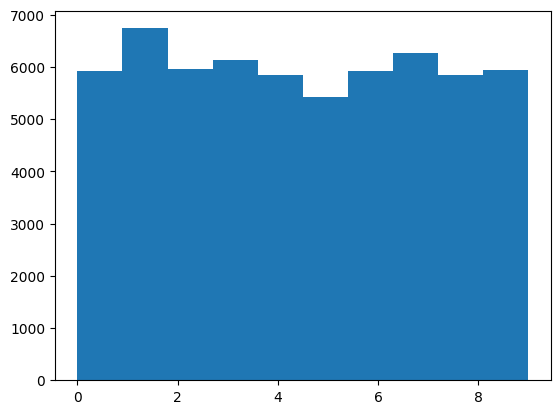

In [26]:
plt.hist(y_train)

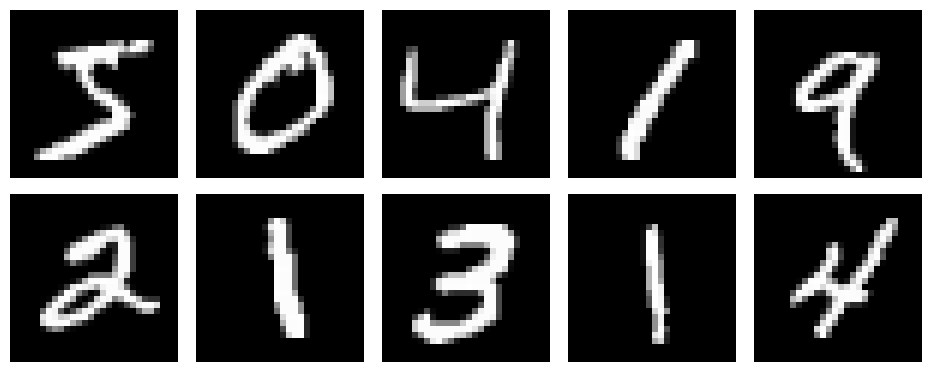

In [32]:
def display_images(data, n_rows = 2, n_cols = 5, figsize=(12,4)):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i], cmap="gray")
        ax.axis("off")

    fig.subplots_adjust(wspace=0, hspace=0.1, bottom=0)

display_images(x_train)

(10, 28, 28)

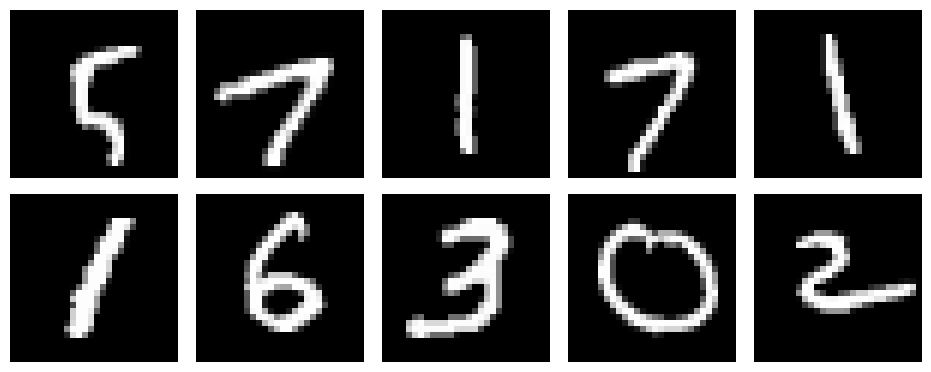

In [35]:
display_images(x_train[100:110])
x_train[100:110].shape